A1

In [5]:
import pandas as pd
import numpy as np

def load_dataset(file_path, sheet_name):
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)
    return df

def preprocess_data(df):
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
    df['High'] = pd.to_numeric(df['High'], errors='coerce')
    df['Low'] = pd.to_numeric(df['Low'], errors='coerce')


    median_price = df['Price'].median()
    df['Class'] = df['Price'].apply(lambda x: 'High' if x >= median_price else 'Low')

    return df

def compute_class_statistics(df, features):
    """Compute centroids, spreads, and Euclidean distance between two classes."""
    class_high = df[df['Class'] == 'High'][features]
    class_low = df[df['Class'] == 'Low'][features]


    centroid_high = class_high.mean()
    centroid_low = class_low.mean()


    spread_high = class_high.std()
    spread_low = class_low.std()

    euclidean_distance = np.linalg.norm(centroid_high - centroid_low)

    return centroid_high, spread_high, centroid_low, spread_low, euclidean_distance

def main():

    file_path = "Lab Session Data.xlsx"
    sheet_name = "IRCTC Stock Price"


    df = load_dataset(file_path, sheet_name)
    df = preprocess_data(df)

    features = ['Price', 'Open', 'High', 'Low']

    centroid_high, spread_high, centroid_low, spread_low, euclidean_distance = compute_class_statistics(df, features)

    results_df = pd.DataFrame({
        "Centroid High": centroid_high,
        "Centroid Low": centroid_low,
        "Spread High": spread_high,
        "Spread Low": spread_low
    })

    print(results_df)
    print(f"Euclidean Distance Between Centroids: {euclidean_distance:.2f}")


if __name__ == "__main__":
    main()


       Centroid High  Centroid Low  Spread High  Spread Low
Price      1754.2148   1365.551210   201.655646   31.218026
Open       1751.1204   1369.277016   208.041745   35.063033
High       1786.2768   1384.370161   205.804404   37.773195
Low        1722.7496   1353.252016   200.375322   29.357423
Euclidean Distance Between Centroids: 771.31


A2

       Centroid High  Centroid Low  Spread High  Spread Low
Price      1754.2148   1365.551210   201.655646   31.218026
Open       1751.1204   1369.277016   208.041745   35.063033
High       1786.2768   1384.370161   205.804404   37.773195
Low        1722.7496   1353.252016   200.375322   29.357423
Euclidean Distance Between Centroids: 771.31


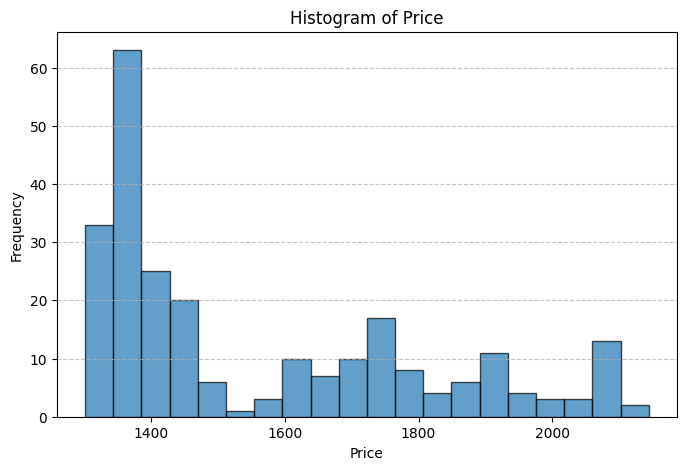

Mean of Price: 1560.66
Variance of Price: 58496.49


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_dataset(file_path, sheet_name):
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)
    return df

def preprocess_data(df):
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
    df['High'] = pd.to_numeric(df['High'], errors='coerce')
    df['Low'] = pd.to_numeric(df['Low'], errors='coerce')


    median_price = df['Price'].median()
    df['Class'] = df['Price'].apply(lambda x: 'High' if x >= median_price else 'Low')

    return df

def compute_class_statistics(df, features):
    class_high = df[df['Class'] == 'High'][features]
    class_low = df[df['Class'] == 'Low'][features]


    centroid_high = class_high.mean()
    centroid_low = class_low.mean()

    spread_high = class_high.std()
    spread_low = class_low.std()

    euclidean_distance = np.linalg.norm(centroid_high - centroid_low)

    return centroid_high, spread_high, centroid_low, spread_low, euclidean_distance

def analyze_feature_distribution(df, feature):
    data = df[feature].dropna()


    mean_value = np.mean(data)
    variance_value = np.var(data)

    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return mean_value, variance_value

def main():

    file_path = "Lab Session Data.xlsx"
    sheet_name = "IRCTC Stock Price"

    df = load_dataset(file_path, sheet_name)
    df = preprocess_data(df)


    features = ['Price', 'Open', 'High', 'Low']


    centroid_high, spread_high, centroid_low, spread_low, euclidean_distance = compute_class_statistics(df, features)

    results_df = pd.DataFrame({
        "Centroid High": centroid_high,
        "Centroid Low": centroid_low,
        "Spread High": spread_high,
        "Spread Low": spread_low
    })

    print(results_df)
    print(f"Euclidean Distance Between Centroids: {euclidean_distance:.2f}")


    mean_price, var_price = analyze_feature_distribution(df, 'Price')
    print(f"Mean of Price: {mean_price:.2f}")
    print(f"Variance of Price: {var_price:.2f}")


if __name__ == "__main__":
    main()


A3

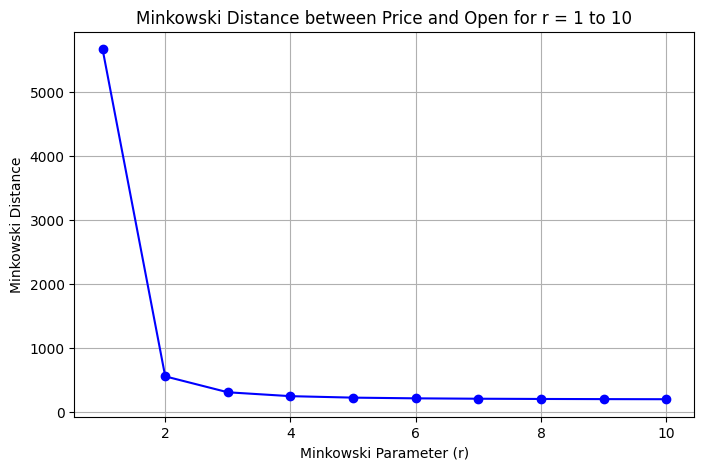

[(1, 5662.299999999999),
 (2, 550.3919694181593),
 (3, 301.50819390983594),
 (4, 240.94947430020423),
 (5, 217.87872469290787),
 (6, 206.86816777852732),
 (7, 200.80001504956726),
 (8, 197.1113853324539),
 (9, 194.71282145384123),
 (10, 193.07861433131603)]

In [ ]:
from scipy.spatial.distance import minkowski
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_name = "Lab Session Data.xlsx"
xls = pd.ExcelFile(file_name)


df_irctc = pd.read_excel(xls, sheet_name="IRCTC Stock Price")

feature1 = "Price"
feature2 = "Open"


vec1 = df_irctc[feature1].dropna().values
vec2 = df_irctc[feature2].dropna().values


min_length = min(len(vec1), len(vec2))
vec1, vec2 = vec1[:min_length], vec2[:min_length]

r_values = range(1, 11)
minkowski_distances = [minkowski(vec1, vec2, r) for r in r_values]

plt.figure(figsize=(8, 5))
plt.plot(r_values, minkowski_distances, marker='o', linestyle='-', color='b')
plt.xlabel("Minkowski Parameter (r)")
plt.ylabel("Minkowski Distance")
plt.title(f"Minkowski Distance between {feature1} and {feature2} for r = 1 to 10")
plt.grid(True)
plt.show()


list(zip(r_values, minkowski_distances))


A4


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_dataset(file_path, sheet_name):
    """Load the dataset from the given Excel sheet."""
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)
    return df

def preprocess_data(df):
    """Convert relevant columns to numeric and define classes based on median price."""
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
    median_price = df['Price'].median()
    df['Class'] = df['Price'].apply(lambda x: 'High' if x >= median_price else 'Low')
    return df

def split_train_test(df, features, target, test_size=0.3):
    """Split the dataset into training and testing sets with only two classes."""
    df = df[df[target].isin(['High', 'Low'])]
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

def main():
    """Main function to execute dataset processing and train-test split."""
    file_path = "Lab Session Data.xlsx"
    sheet_name = "IRCTC Stock Price"
    df = load_dataset(file_path, sheet_name)
    df = preprocess_data(df)
    features = ['Price', 'Open']
    X_train, X_test, y_train, y_test = split_train_test(df, features, 'Class')
    print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

if __name__ == "__main__":
    main()


Training set size: 174, Test set size: 75


A5

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def load_dataset(file_path, sheet_name):
    """Load the IRCTC stock price dataset from the given sheet."""
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)
    return df

def preprocess_data(df):
    """Convert price to numeric and classify data into two classes based on median price."""
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
    df["Open"] = pd.to_numeric(df["Open"], errors="coerce")
    median_price = df["Price"].median()
    df["Class"] = np.where(df["Price"] >= median_price, 1, 0)
    return df.dropna()

def split_data(df, features):
    """Split data into training and testing sets."""
    X = df[features]
    y = df["Class"]
    return train_test_split(X, y, test_size=0.3, random_state=42)

def train_knn_classifier(X_train, y_train, k=3):
    """Train a k-NN classifier with k=3."""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    return knn, scaler

def evaluate_model(knn, scaler, X_test, y_test):
    """Evaluate the trained k-NN classifier on the test set."""
    X_test_scaled = scaler.transform(X_test)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def main():
    """Main function to execute the k-NN classification process."""
    file_path = "Lab Session Data.xlsx"
    sheet_name = "IRCTC Stock Price"
    df = load_dataset(file_path, sheet_name)
    df = preprocess_data(df)
    features = ["Price", "Open"]
    X_train, X_test, y_train, y_test = split_data(df, features)
    knn, scaler = train_knn_classifier(X_train, y_train, k=3)
    accuracy = evaluate_model(knn, scaler, X_test, y_test)
    print(f"Accuracy of k-NN Classifier (k=3): {accuracy:.2f}")

if __name__ == "__main__":
    main()


Accuracy of k-NN Classifier (k=3): 0.99


A6

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def load_dataset(file_path, sheet_name):
    """Load the IRCTC stock price dataset from the given sheet."""
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)
    return df

def preprocess_data(df):
    """Convert price to numeric and classify data into two classes based on median price."""
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
    df["Open"] = pd.to_numeric(df["Open"], errors="coerce")
    median_price = df["Price"].median()
    df["Class"] = np.where(df["Price"] >= median_price, 1, 0)
    return df.dropna()

def split_data(df, features):
    """Split data into training and testing sets."""
    X = df[features]
    y = df["Class"]
    return train_test_split(X, y, test_size=0.3, random_state=42)

def train_knn_classifier(X_train, y_train, k=3):
    """Train a k-NN classifier with k=3."""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    return knn, scaler

def evaluate_model(knn, scaler, X_test, y_test):
    """Evaluate the trained k-NN classifier on the test set."""
    X_test_scaled = scaler.transform(X_test)
    accuracy = knn.score(X_test_scaled, y_test)
    return accuracy

def main():
    """Main function to execute the k-NN classification process."""
    file_path = "Lab Session Data.xlsx"
    sheet_name = "IRCTC Stock Price"
    df = load_dataset(file_path, sheet_name)
    df = preprocess_data(df)
    features = ["Price", "Open"]
    X_train, X_test, y_train, y_test = split_data(df, features)
    knn, scaler = train_knn_classifier(X_train, y_train, k=3)
    accuracy = evaluate_model(knn, scaler, X_test, y_test)
    print(f"Accuracy of k-NN Classifier (k=3): {accuracy:.2f}")

if __name__ == "__main__":
    main()


Accuracy of k-NN Classifier (k=3): 0.99


A7

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def load_dataset(file_path, sheet_name):
    """Load the IRCTC stock price dataset from the given sheet."""
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)
    return df

def preprocess_data(df):
    """Convert price to numeric and classify data into two classes based on median price."""
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
    df["Open"] = pd.to_numeric(df["Open"], errors="coerce")
    median_price = df["Price"].median()
    df["Class"] = np.where(df["Price"] >= median_price, 1, 0)
    return df.dropna()

def split_data(df, features):
    """Split data into training and testing sets."""
    X = df[features]
    y = df["Class"]
    return train_test_split(X, y, test_size=0.3, random_state=42)

def train_knn_classifier(X_train, y_train, k=3):
    """Train a k-NN classifier with k=3."""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    return knn, scaler

def evaluate_model(knn, scaler, X_test, y_test):
    """Evaluate the trained k-NN classifier on the test set."""
    X_test_scaled = scaler.transform(X_test)
    accuracy = knn.score(X_test_scaled, y_test)
    return accuracy

def predict_test_samples(knn, scaler, X_test):
    """Predict the class labels for test samples."""
    X_test_scaled = scaler.transform(X_test)
    predictions = knn.predict(X_test_scaled)
    return predictions

def main():
    """Main function to execute the k-NN classification process."""
    file_path = "Lab Session Data.xlsx"
    sheet_name = "IRCTC Stock Price"
    df = load_dataset(file_path, sheet_name)
    df = preprocess_data(df)
    features = ["Price", "Open"]
    X_train, X_test, y_train, y_test = split_data(df, features)
    knn, scaler = train_knn_classifier(X_train, y_train, k=3)
    accuracy = evaluate_model(knn, scaler, X_test, y_test)
    predictions = predict_test_samples(knn, scaler, X_test)
    print(f"Accuracy of k-NN Classifier (k=3): {accuracy:.2f}")
    print("Predictions for test samples:", predictions)

if __name__ == "__main__":
    main()


Accuracy of k-NN Classifier (k=3): 0.99
Predictions for test samples: [1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1
 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 0]


A8

Accuracy of NN Classifier (k=1): 0.99
Accuracy of k-NN Classifier (k=3): 0.99


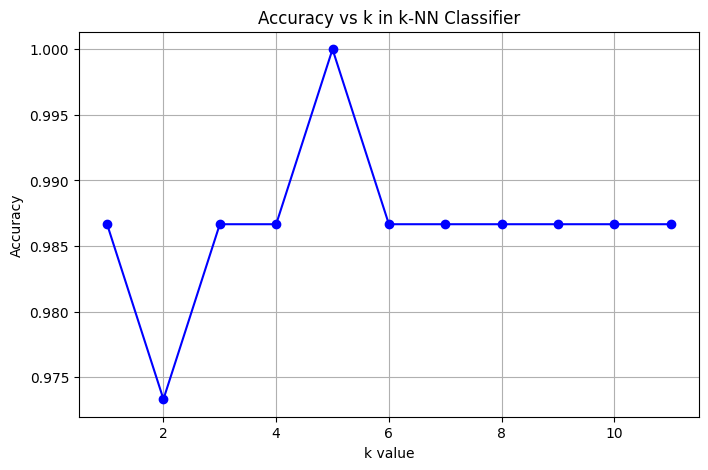

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def load_dataset(file_path, sheet_name):
    """Load the IRCTC stock price dataset from the given sheet."""
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)
    return df

def preprocess_data(df):
    """Convert price to numeric and classify data into two classes based on median price."""
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
    df["Open"] = pd.to_numeric(df["Open"], errors="coerce")
    median_price = df["Price"].median()
    df["Class"] = np.where(df["Price"] >= median_price, 1, 0)
    return df.dropna()

def split_data(df, features):
    """Split data into training and testing sets."""
    X = df[features]
    y = df["Class"]
    return train_test_split(X, y, test_size=0.3, random_state=42)

def train_knn_classifier(X_train, y_train, k):
    """Train a k-NN classifier with a given k value."""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    return knn, scaler

def evaluate_model(knn, scaler, X_test, y_test):
    """Evaluate the trained k-NN classifier on the test set."""
    X_test_scaled = scaler.transform(X_test)
    accuracy = knn.score(X_test_scaled, y_test)
    return accuracy

def plot_accuracy_vs_k(X_train, X_test, y_train, y_test):
    """Vary k from 1 to 11 and plot the accuracy values."""
    k_values = list(range(1, 12))
    accuracies = []

    for k in k_values:
        knn, scaler = train_knn_classifier(X_train, y_train, k)
        accuracy = evaluate_model(knn, scaler, X_test, y_test)
        accuracies.append(accuracy)

    plt.figure(figsize=(8, 5))
    plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
    plt.xlabel('k value')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs k in k-NN Classifier')
    plt.grid(True)
    plt.show()

def main():
    """Main function to execute the k-NN classification and accuracy plot."""
    file_path = "Lab Session Data.xlsx"
    sheet_name = "IRCTC Stock Price"
    df = load_dataset(file_path, sheet_name)
    df = preprocess_data(df)
    features = ["Price", "Open"]
    X_train, X_test, y_train, y_test = split_data(df, features)

    # Train with k=1 (NN classifier) and compare with k=3
    knn1, scaler1 = train_knn_classifier(X_train, y_train, k=1)
    accuracy1 = evaluate_model(knn1, scaler1, X_test, y_test)
    knn3, scaler3 = train_knn_classifier(X_train, y_train, k=3)
    accuracy3 = evaluate_model(knn3, scaler3, X_test, y_test)

    print(f"Accuracy of NN Classifier (k=1): {accuracy1:.2f}")
    print(f"Accuracy of k-NN Classifier (k=3): {accuracy3:.2f}")

    # Generate accuracy plot for k values from 1 to 11
    plot_accuracy_vs_k(X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    main()


A9

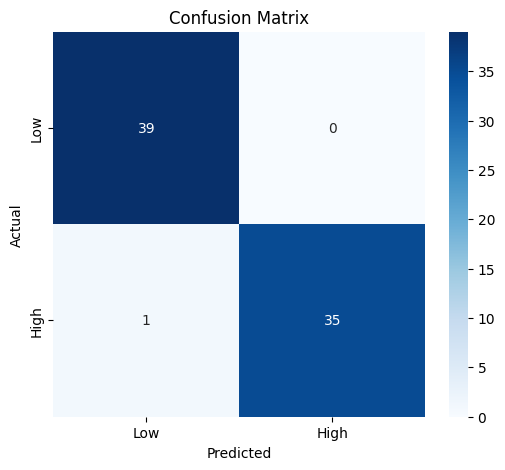

Confusion Matrix:
[[39  0]
 [ 1 35]]

Classification Report:
              precision    recall  f1-score    support
0              0.975000  1.000000  0.987342  39.000000
1              1.000000  0.972222  0.985915  36.000000
accuracy       0.986667  0.986667  0.986667   0.986667
macro avg      0.987500  0.986111  0.986629  75.000000
weighted avg   0.987000  0.986667  0.986657  75.000000


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

def load_dataset(file_path, sheet_name):
    """Load the IRCTC stock price dataset from the given sheet."""
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)
    return df

def preprocess_data(df):
    """Convert price to numeric and classify data into two classes based on median price."""
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
    df["Open"] = pd.to_numeric(df["Open"], errors="coerce")
    median_price = df["Price"].median()
    df["Class"] = np.where(df["Price"] >= median_price, 1, 0)
    return df.dropna()

def split_data(df, features):
    """Split data into training and testing sets."""
    X = df[features]
    y = df["Class"]
    return train_test_split(X, y, test_size=0.3, random_state=42)

def train_knn_classifier(X_train, y_train, k=3):
    """Train a k-NN classifier with a given k value."""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    return knn, scaler

def evaluate_model(knn, scaler, X_test, y_test):
    """Evaluate the trained k-NN classifier on the test set."""
    X_test_scaled = scaler.transform(X_test)
    y_pred = knn.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    return cm, report

def plot_confusion_matrix(cm):
    """Plot confusion matrix using heatmap."""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "High"], yticklabels=["Low", "High"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def main():
    """Main function to execute the k-NN classification and evaluate performance metrics."""
    file_path = "Lab Session Data.xlsx"
    sheet_name = "IRCTC Stock Price"
    df = load_dataset(file_path, sheet_name)
    df = preprocess_data(df)
    features = ["Price", "Open"]
    X_train, X_test, y_train, y_test = split_data(df, features)

    knn, scaler = train_knn_classifier(X_train, y_train, k=3)
    cm, report = evaluate_model(knn, scaler, X_test, y_test)
    plot_confusion_matrix(cm)

    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(pd.DataFrame(report).transpose())

if __name__ == "__main__":
    main()
